/var/folders/18/m8h496tn5tzfpmj_5gwwr2k40000gn/T/ipykernel_6369/3861103394.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, file_df], ignore_index=True)



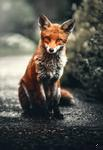
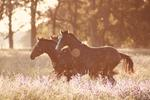
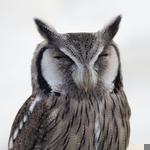
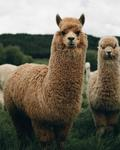
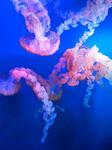
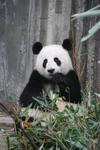

In [51]:
from PIL import Image
import os
import pandas as pd
from io import BytesIO
import glob
import base64
from IPython.display import HTML

df_columns = ['Name', 'Color model', 'Format', 'Channels',
                  'Size', 'Width', 'Height', 'Full path', 'Image']

def process_images(folder_path):
   
    df = pd.DataFrame(columns=df_columns)

    file_list = glob.glob(os.path.join(folder_path, '*'))

    for file_path in file_list:
        try:
            file_df = get_image_info(file_path)
            df = pd.concat([df, file_df], ignore_index=True)
        except Exception:
            pass

    return df

def get_image_info(file_path):
    file_name = os.path.basename(file_path)
    file_size = os.path.getsize(file_path) / (1024 * 1024)  

    with Image.open(file_path) as img:
        width, height = img.size
        mode = img.mode
        format = img.format
        channels = len(img.getbands()) 
    return pd.DataFrame([[file_name, mode, format, channels, round(file_size, 2),
                             width, height, file_path, get_thumbnail(file_path)]], columns=df_columns)

def get_thumbnail(path):
    i = Image.open(path)
    i = i.convert('RGB')
    i.thumbnail((150, 150), Image.LANCZOS)
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

folder_path = '/Users/maksympol/Documents/Data science/lab_4/images'
result_df = process_images(folder_path)
HTML(result_df[df_columns].to_html(formatters={'Image': image_formatter}, escape=False))


In [52]:
from PIL import Image
import os
import random

def resize_image(image_path, target_size):
    original_image = Image.open(image_path)
    width, height = original_image.size

    crop_size = min(width, height)

    left = (width - crop_size) / 2
    top = (height - crop_size) / 2
    right = (width + crop_size) / 2
    bottom = (height + crop_size) / 2

    cropped_image = original_image.crop((left, top, right, bottom))
    resized_image = cropped_image.resize((target_size, target_size))

    return resized_image

def apply_random_color_filter(image):
    available_filters = [
        'RED', 'GREEN', 'BLUE', 'YELLOW', 'PURPLE', 'CYAN'
    ]
    selected_filter = random.choice(available_filters)
    channels = image.split()

    r, g, b = channels[:3]

    if selected_filter == 'RED':
        return Image.merge('RGB', (r, Image.new('L', image.size, 0), Image.new('L', image.size, 0)))    
    elif selected_filter == 'GREEN':
        return Image.merge('RGB', (Image.new('L', image.size, 0), g, Image.new('L', image.size, 0)))   
    elif selected_filter == 'BLUE':
        return Image.merge('RGB', (Image.new('L', image.size, 0), Image.new('L', image.size, 0), b))
    elif selected_filter == 'YELLOW':
        return Image.merge('RGB', (r, g, Image.new('L', image.size, 0)))   
    elif selected_filter == 'PURPLE':
        return Image.merge('RGB', (Image.new('L', image.size, 255), Image.new('L', image.size, 0), b))    
    elif selected_filter == 'CYAN':
        return Image.merge('RGB', (Image.new('L', image.size, 0), g, b))


def generate_poster(input_folder, output_path, columns, rows):
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith((".jpg", ".jpeg", ".png", ".gif"))]

    poster = Image.new('RGB', (columns * 500, rows * 500))

    for row in range(rows):
        for col in range(columns):
            selected_image_file = random.choice(image_files)
            image_path = os.path.join(input_folder, selected_image_file)
            image = resize_image(image_path, 500)
            image = apply_random_color_filter(image)
            poster.paste(image, (col * 500, row * 500))

    poster.save(output_path)
    return poster

input_folder = '/Users/maksympol/Documents/Data science/lab_4/images' 


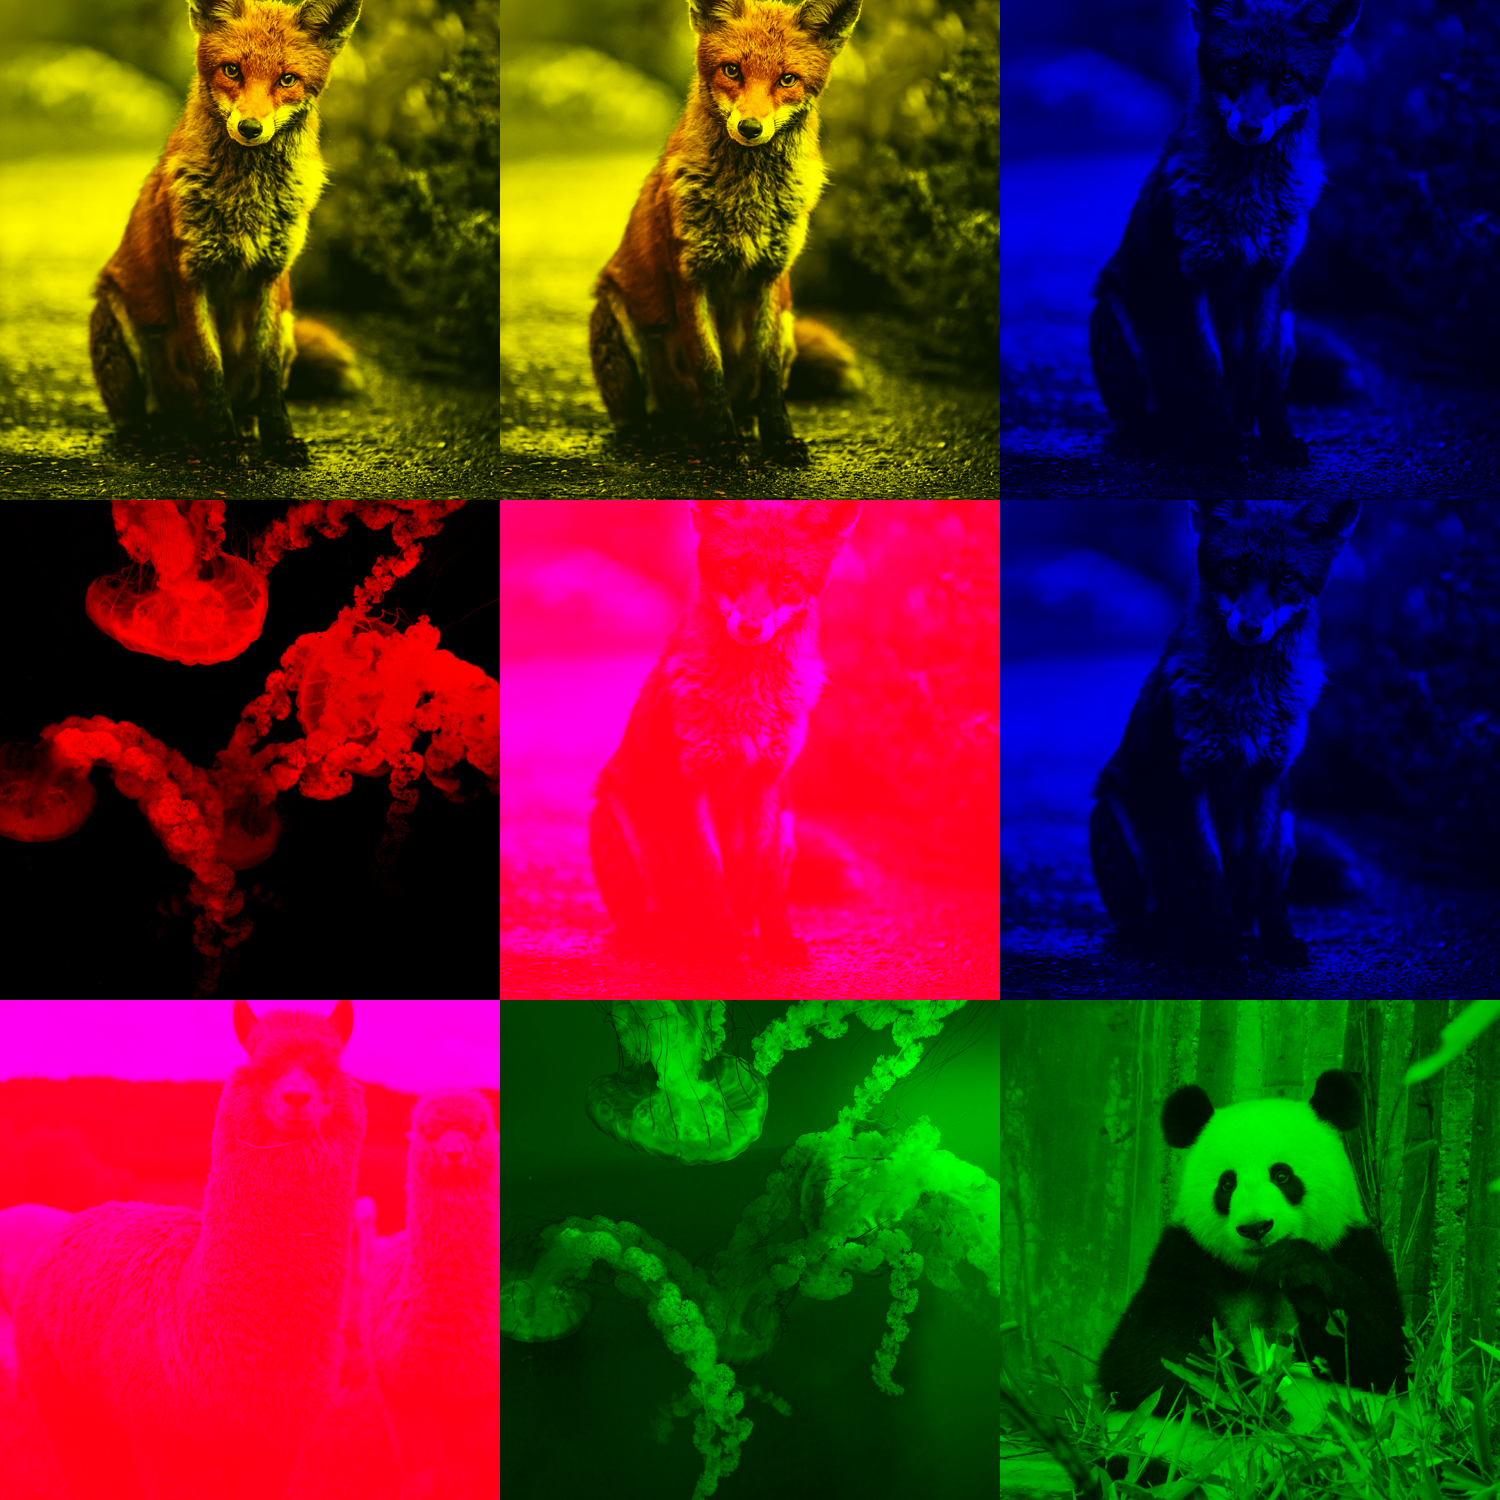

In [53]:
generate_poster(input_folder,'/Users/maksympol/Documents/Data science/lab_4/posters/image69.png' , 3, 3)

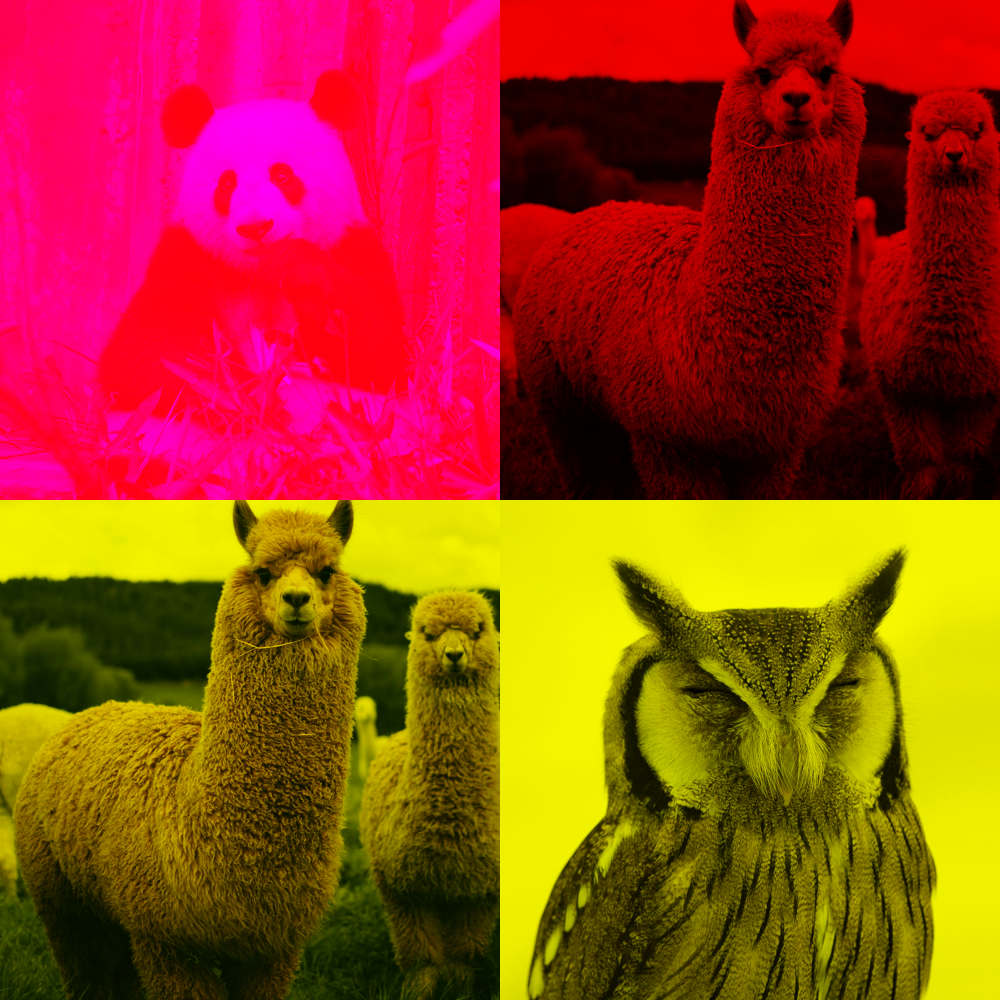

In [54]:
generate_poster(input_folder, '/Users/maksympol/Documents/Data science/lab_4/posters/image96.png' , 2, 2)


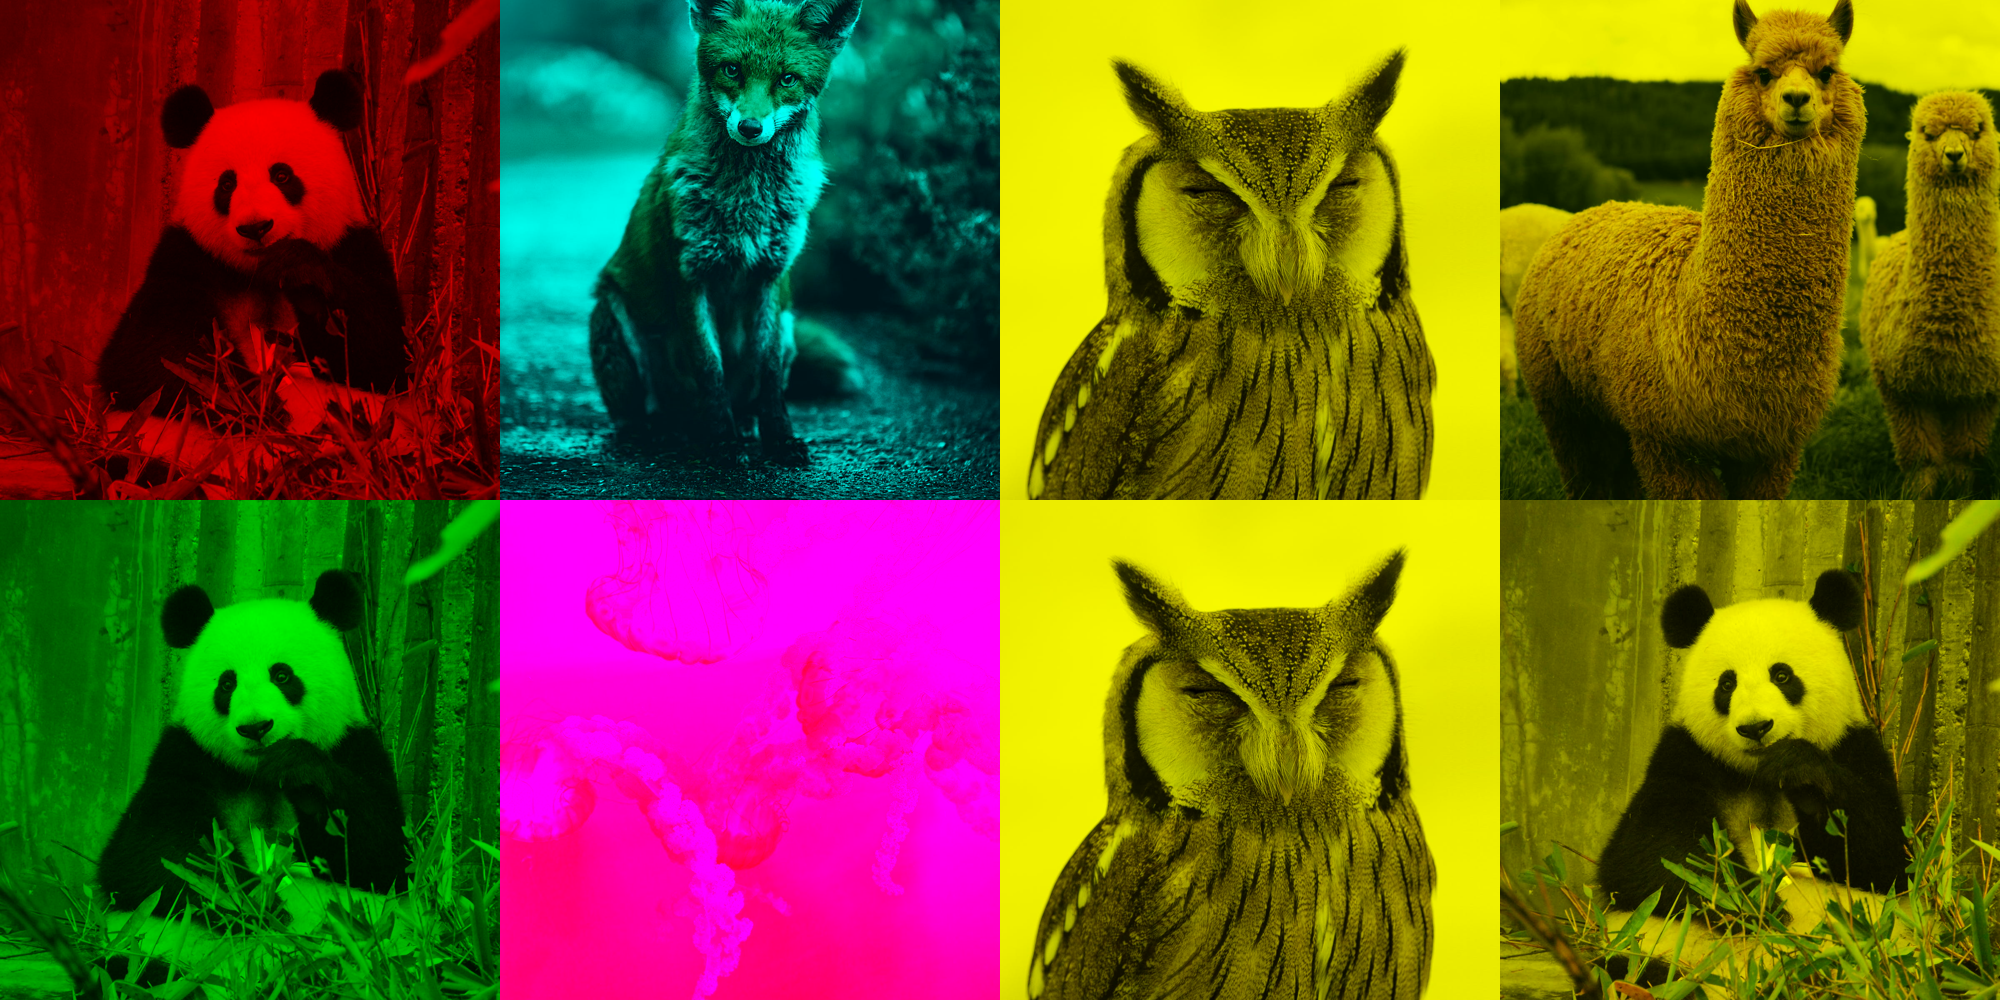

In [55]:
generate_poster(input_folder, '/Users/maksympol/Documents/Data science/lab_4/posters/image322.png' , 4, 2)
